# search
线性搜索、二分搜索

## 线性搜索 (Linear Search) [顺序查找]

线性搜索是一种最简单的搜索方法，它从数组的第一个元素开始，逐个检查每个元素，直到找到目标元素或搜索完整个数组。

```mermaid
graph TD
    B[初始化索引 i = 0] --> C{"i < len(arr) ?"}
    C -->|否| G[返回 -1]
    C -->|是| D{"arr[i] == target ?"}
    D -->|是| E[返回索引 i]
    D -->|否| F[i = i + 1]
    F --> C
    G --> H[结束]
    E --> H
```

In [11]:
def linear_search(arr, target):
    for i in range(len(arr)): 
        if arr[i] == target: 
            return i
    return -1

# test
arr = [4, 7, 2, 15, 6, 1]

print(linear_search(arr, 6))
print(linear_search(arr, 3))

4
-1


### 平均查找长度 (Average Search Length)

- 对于一个长度为 $n$ 的数组，平均查找长度为 $\frac{n+1}{2}$。
$$
ASL = \frac{1}{n} \sum_{i=1}^{n} i = \frac{n+1}{2}  \qquad 每个元素被查找的概率相等
$$
- 时间复杂度：$O(n)$

## 二分搜索 (Binary Search) [折半查找]

二分搜索是一种更高效的搜索方法，它要求数组是有序的。它通过比较目标值和数组中间元素的大小，从而将搜索范围缩小一半。

**条件：**
- 数组是有序的

```mermaid
graph TD
    A[开始] --> B["初始化 left = 0, right = len(arr) - 1"]
    B --> C{"left <= right ?"}
    C -->|否| G[返回 -1]
    C -->|是| D["计算 mid = (left + right) / 2"]
    D --> E{"arr[mid] == target ?"}
    E -->|是| F[返回 mid]
    E -->|否| H{"arr[mid] < target ?"}
    H -->|是| I[left = mid + 1]
    H -->|否| J[right = mid - 1]
    I --> C
    J --> C
    G --> K[结束]
    F --> K
```

In [3]:
# binary search [折半查找]
def binary_search(arr, target):
    left = 0
    right = len(arr) - 1
    while left <= right: 
        mid = (left + right) // 2
        print(f"left: {left}, right: {right}, mid: {mid}, arr[mid]: {arr[mid]}")
        if arr[mid] == target: 
            return mid
        elif arr[mid] < target: 
            left = mid + 1
        else: 
            right = mid - 1
    return -1

arr = [5,16,20,27,30,36,44,55,60,67,71]
print(binary_search(arr, 71))

left: 0, right: 10, mid: 5, arr[mid]: 36
left: 6, right: 10, mid: 8, arr[mid]: 60
left: 9, right: 10, mid: 9, arr[mid]: 67
left: 10, right: 10, mid: 10, arr[mid]: 71
10


### ASL
```mermaid
graph TD
    R((36)) --> R0((20))
    R0 --> R00((5))
    R0 --> R01((27))
    R00 --> R000("(-∞,5)")
    R00 --> R001((16))
    R01 --> R011((30))
    R --> R1((60))
    R1 --> R10((44))
    R10 --> R101((55))
    R1 --> R11((67))
    R11 --> R111((71))
```

## binary search tree (BST) [二叉搜索树]
一种搜索、插入、删除的时间复杂都为 $O(\log_2 n)$ 的数据结构。

[9, 4, 7, 17, 10, 1, 25, 5]

```mermaid
graph TD
    A((9)) --> B((4))
    B --> C((1))
    B --> D((7))
    D --> E((5))
    D --> E1((" "))
    A --> F((17))
    F --> G((10))
    F --> H((25))
```

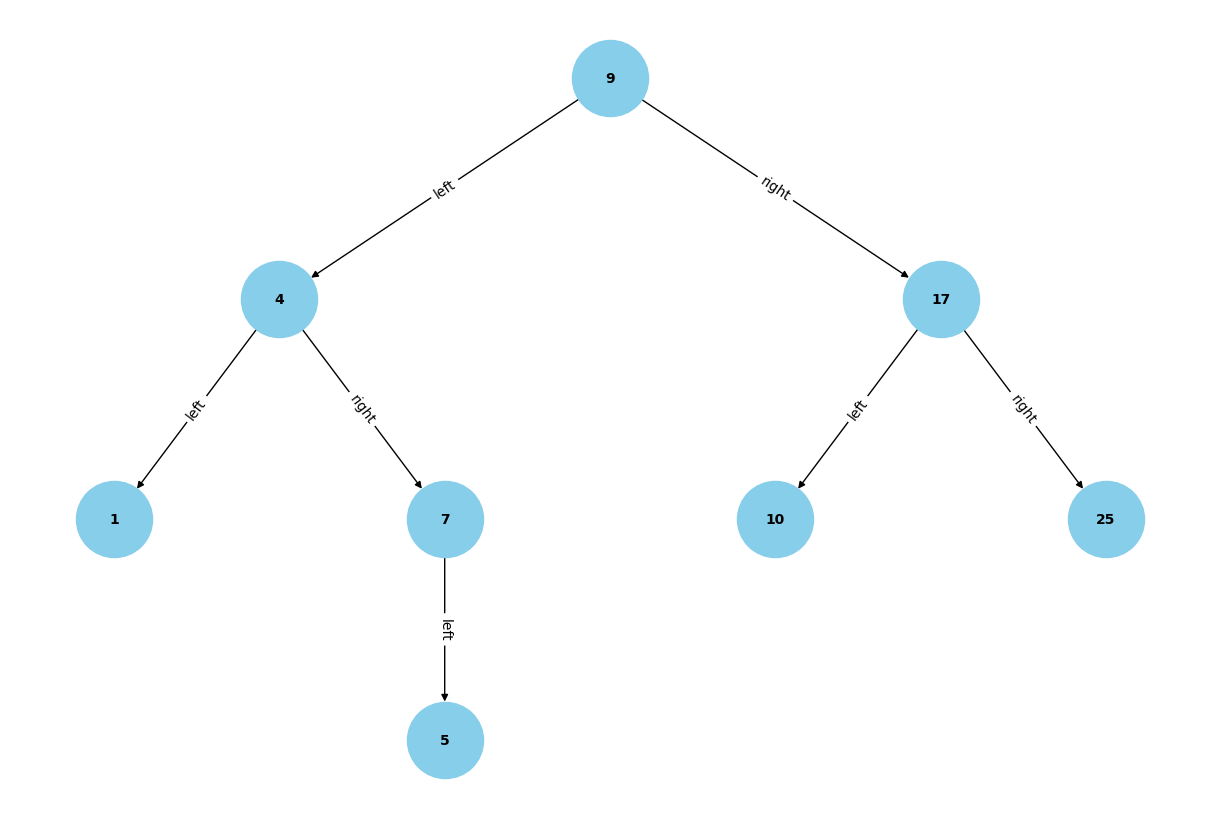

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

class TreeNode:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

def insert(root, key):
    if root is None:
        return TreeNode(key)
    else:
        if root.val < key:
            root.right = insert(root.right, key)
        else:
            root.left = insert(root.left, key)
    return root

def build_bst(arr):
    root = None
    for key in arr:
        root = insert(root, key)
    return root

def add_edges(G, root, pos=None, parent=None, direction=None):
    if root is not None:
        node_label = str(root.val)
        G.add_node(node_label)
        if parent is not None:
            G.add_edge(parent, node_label, label=direction)
        add_edges(G, root.left, pos, node_label, 'left')
        add_edges(G, root.right, pos, node_label, 'right')

def hierarchy_pos(G, root=None, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
    pos = _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)
    return pos

def _hierarchy_pos(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5, pos=None, parent=None, parsed=[]):
    if pos is None:
        pos = {root: (xcenter, vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
        
    children = list(G.neighbors(root))
    if not isinstance(G, nx.DiGraph) and parent is not None:
        children.remove(parent)  
        
    if len(children) != 0:
        dx = width / len(children) 
        nextx = xcenter - width/2 - dx/2
        for child in children:
            nextx += dx
            pos = _hierarchy_pos(G, child, width=dx, vert_gap=vert_gap, vert_loc=vert_loc-vert_gap, xcenter=nextx, pos=pos, parent=root, parsed=parsed)
    
    return pos

def draw_tree(G):
    pos = hierarchy_pos(G, root='9')
    labels = nx.get_node_attributes(G, 'label')
    edge_labels = nx.get_edge_attributes(G, 'label')
    
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, labels={node: node for node in G.nodes()}, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    plt.show()

# 测试
arr = [9, 4, 7, 17, 10, 1, 25, 5]
root = build_bst(arr)
G = nx.DiGraph()
add_edges(G, root)
draw_tree(G)

In [2]:
class TreeNode:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, key):
        if self.root is None:
            self.root = TreeNode(key)
        else:
            self._insert(self.root, key)

    def _insert(self, node, key):
        if key < node.val:
            if node.left is None:
                node.left = TreeNode(key)
            else:
                self._insert(node.left, key)
        else:
            if node.right is None:
                node.right = TreeNode(key)
            else:
                self._insert(node.right, key)

    def search(self, key):
        return self._search(self.root, key)

    def _search(self, node, key):
        if node is None or node.val == key:
            return node
        if key < node.val:
            return self._search(node.left, key)
        else:
            return self._search(node.right, key)

    def delete(self, key):
        self.root = self._delete(self.root, key)

    def _delete(self, node, key):
        if node is None:
            return node
        if key < node.val:
            node.left = self._delete(node.left, key)
        elif key > node.val:
            node.right = self._delete(node.right, key)
        else:
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left
            temp = self._min_value_node(node.right)
            node.val = temp.val
            node.right = self._delete(node.right, temp.val)
        return node

    def _min_value_node(self, node):
        current = node
        while current.left is not None:
            current = current.left
        return current

    def inorder_traversal(self):
        return self._inorder_traversal(self.root, [])

    def _inorder_traversal(self, node, result):
        if node:
            self._inorder_traversal(node.left, result)
            result.append(node.val)
            self._inorder_traversal(node.right, result)
        return result

# 测试
bst = BinarySearchTree()
keys = [9, 4, 7, 17, 10, 1, 25, 5]

for key in keys:
    bst.insert(key)

print("Inorder traversal after insertion:", bst.inorder_traversal())

# 搜索节点
search_key = 10
found_node = bst.search(search_key)
if found_node:
    print(f"Node with key {search_key} found.")
else:
    print(f"Node with key {search_key} not found.")

# 删除节点
delete_key = 7
bst.delete(delete_key)
print(f"Inorder traversal after deleting {delete_key}:", bst.inorder_traversal())

Inorder traversal after insertion: [1, 4, 5, 7, 9, 10, 17, 25]
Node with key 10 found.
Inorder traversal after deleting 7: [1, 4, 5, 9, 10, 17, 25]


In [1]:
import matplotlib.pyplot as plt
import networkx as nx

class TreeNode:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, key):
        if self.root is None:
            self.root = TreeNode(key)
        else:
            self._insert(self.root, key)

    def _insert(self, node, key):
        if key < node.val:
            if node.left is None:
                node.left = TreeNode(key)
            else:
                self._insert(node.left, key)
        else:
            if node.right is None:
                node.right = TreeNode(key)
            else:
                self._insert(node.right, key)

    def search(self, key):
        return self._search(self.root, key)

    def _search(self, node, key):
        if node is None or node.val == key:
            return node
        if key < node.val:
            return self._search(node.left, key)
        else:
            return self._search(node.right, key)

    def delete(self, key):
        self.root = self._delete(self.root, key)

    def _delete(self, node, key):
        if node is None:
            return node
        if key < node.val:
            node.left = self._delete(node.left, key)
        elif key > node.val:
            node.right = self._delete(node.right, key)
        else:
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left
            temp = self._min_value_node(node.right)
            node.val = temp.val
            node.right = self._delete(node.right, temp.val)
        return node

    def _min_value_node(self, node):
        current = node
        while current.left is not None:
            current = current.left
        return current

    def add_edges(self, G, node=None, parent=None, direction=None):
        if node is None:
            node = self.root
        if node is not None:
            node_label = str(node.val)
            G.add_node(node_label)
            if parent is not None:
                G.add_edge(parent, node_label, label=direction)
            self.add_edges(G, node.left, node_label, 'left')
            self.add_edges(G, node.right, node_label, 'right')

def hierarchy_pos(G, root=None, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
    pos = _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)
    return pos

def _hierarchy_pos(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5, pos=None, parent=None, parsed=[]):
    if pos is None:
        pos = {root: (xcenter, vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
        
    children = list(G.neighbors(root))
    if not isinstance(G, nx.DiGraph) and parent is not None:
        children.remove(parent)  
        
    if len(children) != 0:
        dx = width / len(children) 
        nextx = xcenter - width/2 - dx/2
        for child in children:
            nextx += dx
            pos = _hierarchy_pos(G, child, width=dx, vert_gap=vert_gap, vert_loc=vert_loc-vert_gap, xcenter=nextx, pos=pos, parent=root, parsed=parsed)
    
    return pos

def draw_tree(G):
    pos = hierarchy_pos(G, root='9')
    labels = nx.get_node_attributes(G, 'label')
    edge_labels = nx.get_edge_attributes(G, 'label')
    
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, labels={node: node for node in G.nodes()}, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    plt.show()

# 测试
arr = [9, 4, 7, 17, 10, 1, 25, 5]
bst = BinarySearchTree()
for key in arr:
    bst.insert(key)

G = nx.DiGraph()
bst.add_edges(G)
draw_tree(G)

RecursionError: maximum recursion depth exceeded